In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import multiprocessing
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
import pickle

from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.datasets import make_classification

from gensim.models import Word2Vec



from sklearn.metrics import classification_report
import gensim

In [2]:
df= pd.read_csv('./fakevstrue_cleaned.csv')

+ vectorizing-> convert into numbers

In [3]:
df.head(10)

,Unnamed: 0,title,text,subject,date,status,all_cleaned,tokenized,lemmatized,year,lemmatized_joined
0,0,as u s budget fight looms republicans flip the...,washington reuters the head of a conservative ...,politics,2017-12-31,1,as u s budget fight looms republicans flip the...,"['budget', 'fight', 'looms', 'republicans', 'f...","['budget', 'fight', 'loom', 'republican', 'fli...",2017,budget fight loom republican flip fiscal scrip...
1,1,u s military to accept transgender recruits on...,washington reuters transgender people will be ...,politics,2017-12-29,1,u s military to accept transgender recruits on...,"['military', 'accept', 'transgender', 'recruit...","['military', 'accept', 'transgender', 'recruit...",2017,military accept transgender recruit monday pen...
2,2,senior u s republican senator let mr mueller d...,washington reuters the special counsel investi...,politics,2017-12-31,1,senior u s republican senator let mr mueller d...,"['senior', 'republican', 'senator', 'let', 'mr...","['senior', 'republican', 'senator', 'let', 'mr...",2017,senior republican senator let mr mueller job w...
3,3,fbi russia probe helped by australian diplomat...,washington reuters trump campaign adviser geor...,politics,2017-12-30,1,fbi russia probe helped by australian diplomat...,"['fbi', 'russia', 'probe', 'helped', 'australi...","['fbi', 'russia', 'probe', 'helped', 'australi...",2017,fbi russia probe helped australian diplomat ti...
4,4,trump wants postal service to charge much more...,seattle washington reuters president donald tr...,politics,2017-12-29,1,trump wants postal service to charge much more...,"['trump', 'wants', 'postal', 'service', 'charg...","['trump', 'want', 'postal', 'service', 'charge...",2017,trump want postal service charge amazon shipme...
5,5,white house congress prepare for talks on spen...,west palm beach fla washington reuters the whi...,politics,2017-12-29,1,white house congress prepare for talks on spen...,"['white', 'house', 'congress', 'prepare', 'tal...","['white', 'house', 'congress', 'prepare', 'tal...",2017,white house congress prepare talk spending imm...
6,6,trump says russia probe will be fair but timel...,west palm beach fla reuters president donald t...,politics,2017-12-29,1,trump says russia probe will be fair but timel...,"['trump', 'says', 'russia', 'probe', 'fair', '...","['trump', 'say', 'russia', 'probe', 'fair', 't...",2017,trump say russia probe fair timeline unclear n...
7,7,factbox trump on twitter dec approval rating ...,the following statements were posted to the ve...,politics,2017-12-29,1,factbox trump on twitter dec approval rating ...,"['factbox', 'trump', 'twitter', 'dec', 'approv...","['factbox', 'trump', 'twitter', 'dec', 'approv...",2017,factbox trump twitter dec approval rating amaz...
8,8,trump on twitter dec global warming,the following statements were posted to the ve...,politics,2017-12-29,1,trump on twitter dec global warming the follo...,"['trump', 'twitter', 'dec', 'global', 'warming...","['trump', 'twitter', 'dec', 'global', 'warming...",2017,trump twitter dec global warming following sta...
9,9,alabama official to certify senator elect jone...,washington reuters alabama secretary of state ...,politics,2017-12-28,1,alabama official to certify senator elect jone...,"['alabama', 'official', 'certify', 'senator', ...","['alabama', 'official', 'certify', 'senator', ...",2017,alabama official certify senator elect jones t...


In [4]:
df = df.drop(['Unnamed: 0'], axis=1)

## Vectorizing 

+ Bag of words

+ TFIDF: Term Frequency — Inverse Document Frequency (TFIDF)

+ Word2Vec


In [17]:
X= df["lemmatized_joined"] 
y= df["status"]

In [ ]:
#Xtok= df["tokenized"] #quickly checked if there is a big difference between token and lemm 
#ytok= df["status"]

In [ ]:
#Xscl= df["lemmatized_joined"] #quickly checked if there is a big difference between token and lemm 
#yscl= df["status"]

In [ ]:
#Xscl = vectorizer.fit_transform(df["lemmatized_joined"]) 
#Xscl= vectorizer.fit_transform(df["lemmatized_joined"]) 


In [ ]:
# creating bag of words model - > checked the difference 

In [ ]:
#from sklearn.feature_extraction.text import CountVectorizer #create bag of words

#bow = CountVectorizer().fit(df["lemmatized_joined"])

#vec = bow.transform(df["lemmatized_joined"])

In [ ]:
#from sklearn.feature_extraction.text import TfidfTransformer

#tfidf_trans = TfidfTransformer().fit(vec)
#Xbow = tfidf_trans.transform(vec)

## tfidf

In [19]:
vectorizer = TfidfVectorizer() #max_features? decided by testing around 

# The higher the score, the more important that word is.
#weight will be less

In [20]:
X = vectorizer.fit_transform(df["lemmatized_joined"]) 

In [ ]:
#X = vectorizer.fit_transform(df["lemmatized_joined"]) 

In [21]:
len(vectorizer.get_feature_names())

104619

In [22]:
test= pd.DataFrame.sparse.from_spmatrix(X) # sparse matrices just zeros because of the huge amount 
test

,0,1,2,3,4,5,6,7,8,9,...,104609,104610,104611,104612,104613,104614,104615,104616,104617,104618
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44674,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44675,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44676,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44677,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
print(X.max())

0.9696950225361065


In [10]:
print(X.mean())

8.185470307442323e-05


In [ ]:
#We have around 104618 words in our vocabulary
#, which means that every sentence will be represented as a vector of length 100k. The vector will contain mostly 0s because each sentence contains only a very small subset of our vocabulary


In [11]:
print(X.shape)

(44679, 104619)


In [ ]:
df.lemmatized_joined

## Word2Vec

In [ ]:
#eyedVectors is a package present inside genism and ‘GoogleNews-vectors-negative300.bin’
#is a google dataset, which is used here for training

#lemmatized-> just words here 

#size default 100
#min count of words default is 5
# number of partitioins during training default i 3
#default algorithm is cbow0 or skip gram 1

#model = gensim.models.Word2Vec(df.lemmatized, min_count=1, workers=3, window =3, sg = 1)

In [ ]:
#model("trump")

## Modeling

+ Naiv bayes
+ Support Vector Machines
+ random foresst
+ passiv agressiv


In [23]:
#split the data 
X_train, X_test, y_train,y_test= train_test_split(X, y, test_size=0.32, random_state=42 )

In [24]:
X_train.shape

(30381, 104619)

In [25]:
y_train.shape

(30381,)

## Naiv Bayes: classification technique: large datasets

#Auswahl der Wörter ausschließlich davon abhängt,
#ob es sich bei der jeweiligen Botschaft um Fake oder Real handelt ->kein zusammenhang zwischen den Wörtern, -> naive Methode


##Bernoulli Naive Bayes :

#Gaussian Naive Bayes , cointinous features: height etc


#Multinomial Naive Bayes :count  how often word occurs in the document, number of times -> Its is used when we have discrete data (e.g. movie ratings ranging 1 and 5 as each rating will have certain frequency to represent).
#In text learning we have the count of each word to predict the class or label


In [118]:


clf_mult = MultinomialNB()
classifier = clf_mult.fit(X_train,y_train) #train the data 
predict_naiv= classifier.predict(X_test) #i want to see the performance on test


acc=(accuracy_score(y_test,predict_naiv))
#acc_test=(accuracy_score(y_train,predict_naiv))
print('Accuracy for the test model is ',acc*100)
#print('Accuracy for the train model is', acc_test*100)

cross_naiv = cross_val_score(clf_mult, X_train, y_train, cv=10)


print( " Cross validation: %0.3f ( +/- %0.2f)" % (cross_naiv.mean(), cross_naiv.std() * 2) )

 

Accuracy for the test model is  93.71240732969646
 Cross validation: 0.933 ( +/- 0.01)


In [119]:
#train model

predict_naiv_train= classifier.predict(X_train)
acc_train=(accuracy_score(y_train,predict_naiv_train))
print('Accuracy for the train model is', acc_train*100)

Accuracy for the train model is 94.09170205062375


In [120]:
print(classification_report(y_test, predict_naiv, target_names = ['Fake','Not Fake']))

#The F1 score can be interpreted as a weighted average of the precision and recall,

#precision: proportion of positive indentifficationes -> if no false positive than it would be 1
#recall: proortion of  positives correctly classified: no fals negative would be 1
#f1: combination precision and recall
#support :number of samples, 7019 von labeled fake 
#accuracy of the model
#macro avege: avg precision, recall and f1 score -> more for imblanced data but here_> class balanced because its around 50%
#weightet avg: quite similar because its balanced ->  otherwise would be here 50 % sowas




              precision    recall  f1-score   support

        Fake       0.93      0.95      0.94      7485
    Not Fake       0.95      0.92      0.93      6813

    accuracy                           0.94     14298
   macro avg       0.94      0.94      0.94     14298
weighted avg       0.94      0.94      0.94     14298



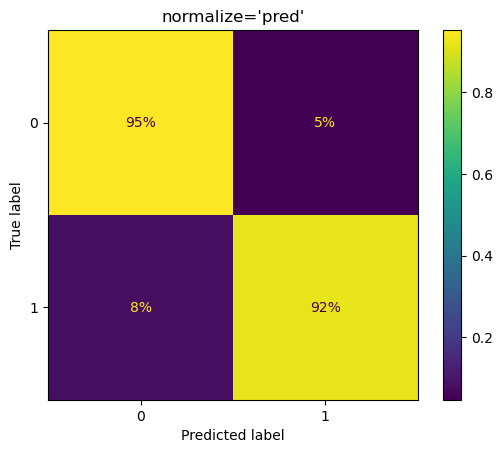

In [121]:
from sklearn.metrics import confusion_matrix

plot_confusion_matrix(clf_mult,X_test,y_test, values_format= '.0%', normalize='true'); plt.title("normalize='pred'")
plt.show()

## random forest

In [122]:

#dont need transformation
#cross validiation always apply -> random forrest it checkes outlier or not

#max_depth none-> if its too high it overfit

clf_random = RandomForestClassifier(random_state = 0) #Create a Gaussian Classifier
clf_random.fit(X_train, y_train) #Train the model using the training sets y_pred=clf.predict(X_test)
predi_random=clf_random.predict(X_test)


acc=(accuracy_score(y_test,predi_random))
print('Accuracy for the model is ',acc*100)

Accuracy for the model is  98.81102252063225


In [123]:

score_random = cross_val_score(clf, X_train, y_train, cv=5)
print(score_random)

print( " Accuracy: %0.3f ( +/- %0.2f)" % (cross_val_scores.mean(), cross_val_scores.std() * 2) )



NameError: name 'clf' is not defined

In [ ]:
predict_random_train= classifier.predict(X_train)
accrandom_train=(accuracy_score(y_train,predict_random_train))
print('Accuracy for the train model is', accrandom_train*100)

In [ ]:
print(classification_report(y_test, predi_random, target_names = ['Fake','Not Fake']))

In [ ]:
plot_confusion_matrix(clf,X_test,y_test)
plt.show()

## Linear Support Vector Classification (SVC)

In [ ]:
#Xscl= df["lemmatized_joined"] # checked if there is a big difference between token and lemm 
#yscl= df["status"]

In [ ]:
#Xscl.shape

In [ ]:
#yscl.shape

In [ ]:
#Xscl_train, Xscl_test, yscl_train,yscl_test= train_test_split(Xscl, yscl, test_size=0.30, random_state=42 )

In [26]:
import sklearn as svm
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

In [ ]:
#solve convext optimization problem -> so every obersvation is on one side

#-> goal optimale hyperplane -> die obeservations durchteilt

# wenn nicht liniear seperiert werden könne: kernal trick-> from 2D to 3D -> dann kann seperiert werden

#support vector beachten -> maximierung der abstände -> margin -> hinge loss function 

#loss function is null wenn 

In [ ]:
#from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler(with_mean=False)#X_trainIf True, center the data before scaling. This does not work (and will raise an exception) when attempted on sparse matrices, because centering them entails building a dense matrix which in common use cases is likely to be too large to fit in memory.
#scaler.fit(Xscl_train)
#X_train_scaled = scaler.transform(Xscl_train)
#X_test_scaled = scaler.transform(Xscl_test)



In [ ]:
#clfscl_svm = SVC(kernel='linear') #kernel type , c# value

#clfscl_svm .fit(Xscl_train, yscl_train) #fit on training to predict

In [ ]:
#predictscl_svc=clfscl_svm.predict(Xscl_train)

#acc=(accuracy_score(yscl_test,predictscl_svc))
#print('Accuracy for the model is ',acc*100)

### Max iter 1000 without scaling 

In [27]:
clf_svm = SVC(kernel='linear' , max_iter=1000) #kernel type , c# value check with gridsearch

clf_svm.fit(X_train, y_train)


/opt/anaconda3/envs/DA_env/lib/python3.8/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


SVC(kernel='linear', max_iter=1000)

In [28]:
predict_svc=clf_svm.predict(X_test)

acc=(accuracy_score(y_test,predict_svc))
print('Accuracy for the model is ',acc*100)

Accuracy for the model is  99.17470974961533


In [29]:



cross_val_scores = cross_val_score(clf_svm, X_train, y_train, cv=4)

print()

print( " Cross validation: %0.3f ( +/- %0.5f)" % (cross_val_scores.mean(), cross_val_scores.std() * 2) )


/opt/anaconda3/envs/DA_env/lib/python3.8/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/opt/anaconda3/envs/DA_env/lib/python3.8/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/opt/anaconda3/envs/DA_env/lib/python3.8/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/opt/anaconda3/envs/DA_env/lib/python3.8/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with Stand


 Cross validation: 0.991 ( +/- 0.00175)


In [30]:
predict_svc_train= clf_svm.predict(X_train)
accsvc_train=(accuracy_score(y_train,predict_svc_train))
print('Accuracy for the train model is', accsvc_train*100)

Accuracy for the train model is 99.82225733188506


In [31]:
print(classification_report(y_test, predict_svc, target_names = ['Fake','Not Fake']))

              precision    recall  f1-score   support

        Fake       0.99      0.99      0.99      7485
    Not Fake       0.99      0.99      0.99      6813

    accuracy                           0.99     14298
   macro avg       0.99      0.99      0.99     14298
weighted avg       0.99      0.99      0.99     14298



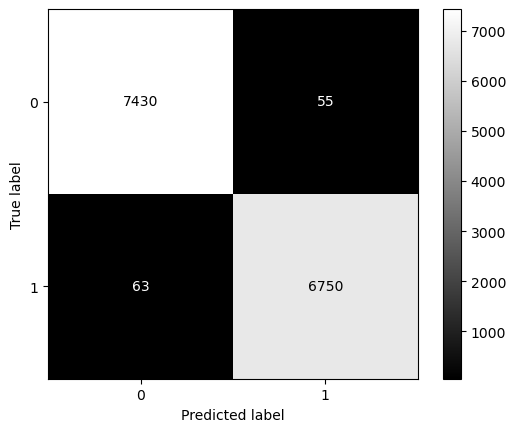

In [32]:
plot_confusion_matrix(clf_svm, X_test, y_test, cmap=plt.cm.gray)
plt.show()

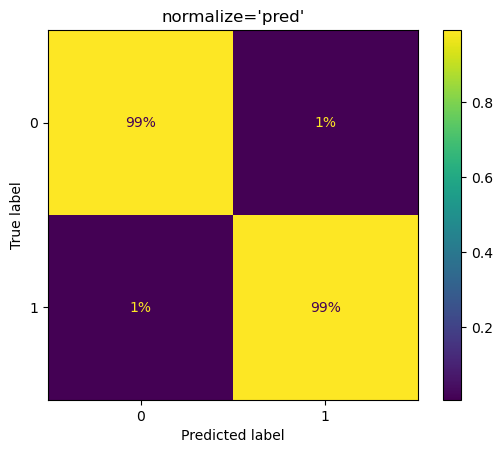

In [33]:

plot_confusion_matrix(clf_svm, X_test, y_test, values_format= '.0%', normalize='true'); plt.title("normalize='pred'");
plt.show()

In [45]:
model_svc = "Pickle_svc_Model.pkl"  #name

with open(model_svc, 'wb') as file:  
    pickle.dump(clf_svm, file)

In [46]:
with open(model_svc, 'rb') as file: # test if i can load
    model_svc = pickle.load(file)

In [ ]:
pkl_filename.predict()

#vectorizin

## Passiv agressiv classifier

In [ ]:
#compare with tokenize instead lemm

#Xtok_train, Xtok_test, y_train,y_test= train_test_split(Xtok, y, test_size=0.30, random_state=42 )

In [ ]:
#clf_pac = PassiveAggressiveClassifier()

#clf_pac.fit(Xtok_train,y_train)

#predict_pac=clf_pac.predict(Xtok_test)

#acc=(accuracy_score(y_test,predict_pac))
#print('Accuracy for the model is ',acc*100)

In [ ]:
#predict_pac_train= clf_pac.predict(Xtok_train)
#accsvc_train=(accuracy_score(y_train,predict_pac_train))
#print('Accuracy for the train model is', accsvc_train*100)

In [127]:
clf_pac = PassiveAggressiveClassifier(n_jobs=50)

clf_pac.fit(X_train,y_train)

predict_pac=clf_pac.predict(X_test)

acc=(accuracy_score(y_test,predict_pac))
print('Accuracy for the model is ',acc*100)

Accuracy for the model is  99.23066163099735


In [128]:
predict_pac_train= clf_pac.predict(X_train)
accsvc_train=(accuracy_score(y_train,predict_pac_train))
print('Accuracy for the train model is', accsvc_train*100)

Accuracy for the train model is 100.0


In [129]:

cross_pac = cross_val_score(clf_pac, X_train, y_train, cv=10)


print( " Cross validation: %0.6f ( +/- %0.2f)" % (cross_pac.mean(), cross_pac.std() * 2) )

 Cross validation: 0.992627 ( +/- 0.00)


In [130]:
print(classification_report(y_test, predict_pac, target_names = ['Fake','Not Fake']))

              precision    recall  f1-score   support

        Fake       0.99      0.99      0.99      7485
    Not Fake       0.99      0.99      0.99      6813

    accuracy                           0.99     14298
   macro avg       0.99      0.99      0.99     14298
weighted avg       0.99      0.99      0.99     14298



## Model tuning with Gridsearch

In [ ]:
#from sklearn.model_selection import GridSearchCV

In [ ]:


#parameters= {"C" :( 1, 4, 5, 23) }
                        
#svc= SVC()
#clf = GridSearchCV(svc, parameters, cv=5)
#clf.fit(X_train, y_train)


#parameters= {"n_estimators" :( 50, 100, 150, 200) }
´

#clf = RandomForestClassifier(parameters, random_state = 0) #Create a Gaussian Classifier
#clf.fit(X_train, y_train



In [34]:
vectorization = TfidfVectorizer()

In [86]:
import re

def clean_text(x):
    x = str(x).lower().replace("_"," ")
    x = re.sub(r'\W+',' ',x) # Replace everything non-alpahnumeric by ' '
    x = re.sub(r'\s+',' ',x) # Replace one or more whitespaces by  ' '
    x = re.sub(r'\d+',"",x) # Replace one or more digits by  ' '
    
    return x

In [136]:
def output_label(n):
    if n==0:
        return("Fake News")
    elif n==1:
        return("Real news")
    
    
def livedemo(news):
    
    testing_news = {"text": [news]}#my input
    new_def_test=pd.DataFrame(testing_news) 
    new_def_test["text"]= new_def_test["text"].apply(clean_text)#cleaned data 
    new_x_test= new_def_test["text"]
    new_xv_test= vectorizer.transform(new_x_test) #vectorizing
    predict = model_svc.predict(new_xv_test) #m
    
    
    
    
    return print("\n This one is:", output_label(predict))

## Live Demo 

In [137]:
news = str(input())
livedemo(news)

All eight winners of the 2021 Nobel Prizes in medicine, chemistry, physics and literature have been men, re-igniting a recurring debate about diversity in the highly coveted awards, particularly those in science.  Ardem Patapoutian and David Julius received the Nobel for medicine on Monday. Giorgio Parisi, Syukuro Manabe and Klaus Hasselmann won the physics gong for their work deciphering chaotic climate, while Benjamin List and David MacMillan received the chemistry accolade for developing a tool for molecule building.  Tanzanian novelist Abdulrazak Gurnah, 72, on Wednesday became only the second writer of color in sub-Suharan Africa ever to win a Nobel Prize for Literature. The last Black recipient of the prize was Toni Morrison in 1993.  "Abdulrazak Gurnah meets at least one of the criterion of a writer from a non-traditional cultural circle - a non-European with a colonial background, but he's no woman," said Anne-Marie Morhed, head of the Swedish Association of Female Academics

 

In [138]:
news = str(input())
livedemo(news)

Stating it “just didn’t add up,” the U.S. populace told reporters Wednesday that they didn’t understand how someone as cool as Kyrsten Sinema could fight for corporate interests. “She’s really someone who has it all—a winning personality, a killer sense of style—so I was really shocked when I found out about all the corporate donations she’s raking in,” said 34-year-old Anna Monto, a constituent of the senior senator from Arizona, who spoke on behalf of all 330 million Americans in expressing her confusion as to how someone who oozes as much charm and charisma as Sinema could turn out to be just another lapdog for big business. “If she wasn’t my senator, she would be my best friend. Anyone who’s ever seen her on TV or social media knows she’s a total bad ass. I mean, did you see those wigs? It just doesn’t make any sense. At least we still have Joe Manchin.” At press time, the nation had reached the conclusion that the pharmaceutical and medical industries must just also be really fuck